# Cluster labels

This notebook is used to determine cluster labels for each clusters. It prints 12 random pictures for each cluster. It is possible to test different random states.

In [1]:
import pickle
import random
import colorsys
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

import altair as alt
from keras.preprocessing.image import load_img 

%matplotlib inline
alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

In [2]:
project_name = 'Delft'
images_folder = r'W:\staff-umbrella\imagesummary\data\Delft_NL\imagedb'
image_features_folder = r'Data\Delft\image_features'
network_data_path = r'C:\Users\lange\OneDrive\Documenten\Jaar_5-Msc_CE_TTE\DSAIE_STREETS\Data_old\Delft_NL'
name = 'edges_drive'
number_of_clusters = 7

In [3]:
clustering_results = pd.read_csv(f"Data\\{project_name}\\{name}_clustering_results.csv")

with open(f"Data\\{project_name}\\{name}_image_assignments.pkl", 'rb') as file:
    image_assignments = pickle.load(file)

In [4]:
def assign_images_to_clusters(clustering_results: pd.DataFrame, image_assignments: dict[str, list[str]]) -> dict[int, list[str]]:
    cluster_images = {key: [] for key in range(number_of_clusters)}

    for _, section_clusters in clustering_results.iterrows():
        cluster_images[section_clusters['cluster_km']].extend(image_assignments[section_clusters['section_id']])
        cluster_images[section_clusters['cluster_hr']].extend(image_assignments[section_clusters['section_id']])
        cluster_images[section_clusters['cluster_gm']].extend(image_assignments[section_clusters['section_id']])
    
    return cluster_images

In [5]:
cluster_images = assign_images_to_clusters(clustering_results, image_assignments)

In [6]:
def sample_cluster_images(cluster_images: dict[int, list[str]], cluster: int, nrows: int=3, ncols: int=7) -> None:

    image_sample = random.sample(cluster_images[cluster], int(nrows*ncols))

    images = [load_img(f"{images_folder}\\{image}", target_size=(224,224)) for image in image_sample]

    f, axes = plt.subplots(nrows, ncols, figsize=(2.5*ncols, 2.5*nrows))
    f.suptitle(f'Image Sample for cluster {cluster}')
    axes = axes.flatten()[:len(images)]
    
    for image, ax in zip(images, axes): 
        ax.imshow(image)
        ax.set_xticks([])
        ax.set_yticks([])


In [7]:
network = gpd.read_file(f"Data\\{project_name}\\networks\\{name}.geojson")
id_column = 'osmid'

network[id_column] = network[id_column].astype('str')
network['cluster_km'] = [None] * len(network)
network['cluster_hr'] = [None] * len(network)
network['cluster_gm'] = [None] * len(network)

for index, section in network.iterrows():
    if section[id_column] in clustering_results['section_id'].values:
        section_results = clustering_results[clustering_results['section_id'] == section[id_column]]
        network.loc[index, 'cluster_km'] = section_results['cluster_km'].values[0]
        network.loc[index, 'cluster_hr'] = section_results['cluster_hr'].values[0]
        network.loc[index, 'cluster_gm'] = section_results['cluster_gm'].values[0]


Skipping field lanes: unsupported OGR type: 5
Skipping field name: unsupported OGR type: 5
Skipping field highway: unsupported OGR type: 5
Skipping field maxspeed: unsupported OGR type: 5
Skipping field bridge: unsupported OGR type: 5
Skipping field width: unsupported OGR type: 5


In [8]:
def generate_color_codes(number_of_colors: int, intital_offset: float=0.4) -> list[tuple[float, float, float]]:
    golden_ratio_conjugate = 0.618033988749895
    h = intital_offset

    colors = []
    for i in range(number_of_colors):
        h += golden_ratio_conjugate
        h = h % 1
        rbg_color = colorsys.hsv_to_rgb(h, 0.8, 0.85)
        colors.append('#%02x%02x%02x' % (int(rbg_color[0]*255), int(rbg_color[1]*255), int(rbg_color[2]*255)))

    return colors


In [11]:
network

u            v  key       osmid  oneway reversed   length  \
0        27082148     44839614    0    48688450   False        0  141.011   
1        27082148     44835830    0     7537370   False        1   39.821   
2        27082148     44833192    0    48688450   False        1  124.181   
3        30016605     44739609    0   144919697   False        0   77.054   
4        30016605     44736833    0     7539987   False        0   68.460   
...           ...          ...  ...         ...     ...      ...      ...   
5780  11458262729   1833104274    0   557278782   False        0   27.395   
5781  11460591406   1448391106    0   182011757   False        0   33.920   
5782  11460591406   5353328924    0   182011757   False        1    6.424   
5783  11460591406  11460591407    0  1234699977   False        1   28.051   
5784  11460591407  11460591406    0  1234699977   False        0   28.051   

     tunnel access   ref junction  \
0      None   None  None     None   
1      None   None  None     None   
2      None   None  None     None   
3      None   None  None     None   
4      None   None  None     None   
...     ...    ...   ...      ...   
5780   None   None  None     None   
5781   None   None  None     None   
5782   None   None  None     None   
5783   None   None  None     None   
5784   None   None  None     None   

                                               geometry cluster_km cluster_hr  \
0        LINESTRING (4.37897 52.0084, 4.37721 52.00906)          4          3   
1     LINESTRING (4.37897 52.0084, 4.3789 52.00834, ...          1          3   
2     LINESTRING (4.37897 52.0084, 4.37971 52.00809,...          4          3   
3        LINESTRING (4.35604 51.98636, 4.3558 51.98704)          2          1   
4     LINESTRING (4.35604 51.98636, 4.35646 51.98643...       None       None   
...                                                 ...        ...        ...   
5780  LINESTRING (4.33716 51.99404, 4.33683 51.99398...          2          2   
5781    LINESTRING (4.32608 52.01204, 4.32647 52.01223)          5          6   
5782      LINESTRING (4.32608 52.01204, 4.326 52.01201)          5          6   
5783    LINESTRING (4.32608 52.01204, 4.32585 52.01225)       None       None   
5784    LINESTRING (4.32585 52.01225, 4.32608 52.01204)       None       None   

     cluster_gm  
0             3  
1             3  
2             3  
3             2  
4          None  
...         ...  
5780          2  
5781          0  
5782          0  
5783       None  
5784       None  

[5785 rows x 15 columns]

In [9]:
# domain_edges = list(range(number_of_clusters))
# domain_edges.append(None)
# range_colors = generate_color_codes(number_of_clusters)
# range_colors.append('darkgray')

domain_edges = list(range(number_of_clusters))
range_colors = generate_color_codes(number_of_clusters)

background = alt.Chart(network).mark_geoshape(
    filled=False,
    stroke='darkgray',
    strokeWidth=2.5
).encode(
    tooltip=['osmid:N', 'cluster_km:N', 'cluster_hr:N', 'cluster_gm:N'],
).properties(
    width=400,
    height=550,
).project(
    'mercator'
)

k_means_edges = alt.Chart(network).mark_geoshape(
    filled=False,
    strokeWidth=2.5
).encode(
    tooltip=['osmid:N', 'cluster_km:N', 'cluster_hr:N', 'cluster_gm:N'],
    color = alt.Color('cluster_km:N').scale(domain=domain_edges, range=range_colors)
).properties(
    width=400,
    height=550,
    title='K-means'
).project(
    'mercator'
)

hierarch_edges = alt.Chart(network).mark_geoshape(
    filled=False,
    strokeWidth=2.5
).encode(
    tooltip=['osmid:N', 'cluster_km:N', 'cluster_hr:N', 'cluster_gm:N'],
    color = alt.Color('cluster_hr:N').scale(domain=domain_edges, range=range_colors)
).properties(
    width=400,
    height=550,
    title='Hierachical'
).project(
    'mercator'
)

gaussian_edges = alt.Chart(network).mark_geoshape(
    filled=False,
    strokeWidth=2.5
).encode(
    tooltip=['osmid:N', 'cluster_km:N', 'cluster_hr:N', 'cluster_gm:N'],
    color = alt.Color('cluster_gm:N').scale(domain=domain_edges, range=range_colors)
).properties(
    width=400,
    height=550,
    title='Gaussian Mixture'
).project(
    'mercator'
)


In [10]:
background + k_means_edges | background + hierarch_edges | background + gaussian_edges

alt.HConcatChart(...)

In [11]:
cluster_names = {0: 'Distributor / Industrial',
                 1: 'Residential Inner A',
                 2: 'Residential Inner B',
                 3: 'City Centre',
                 4: 'Residential Artery / Greenery',
                 5: 'City Centre Core',
                 6: 'Highway',}

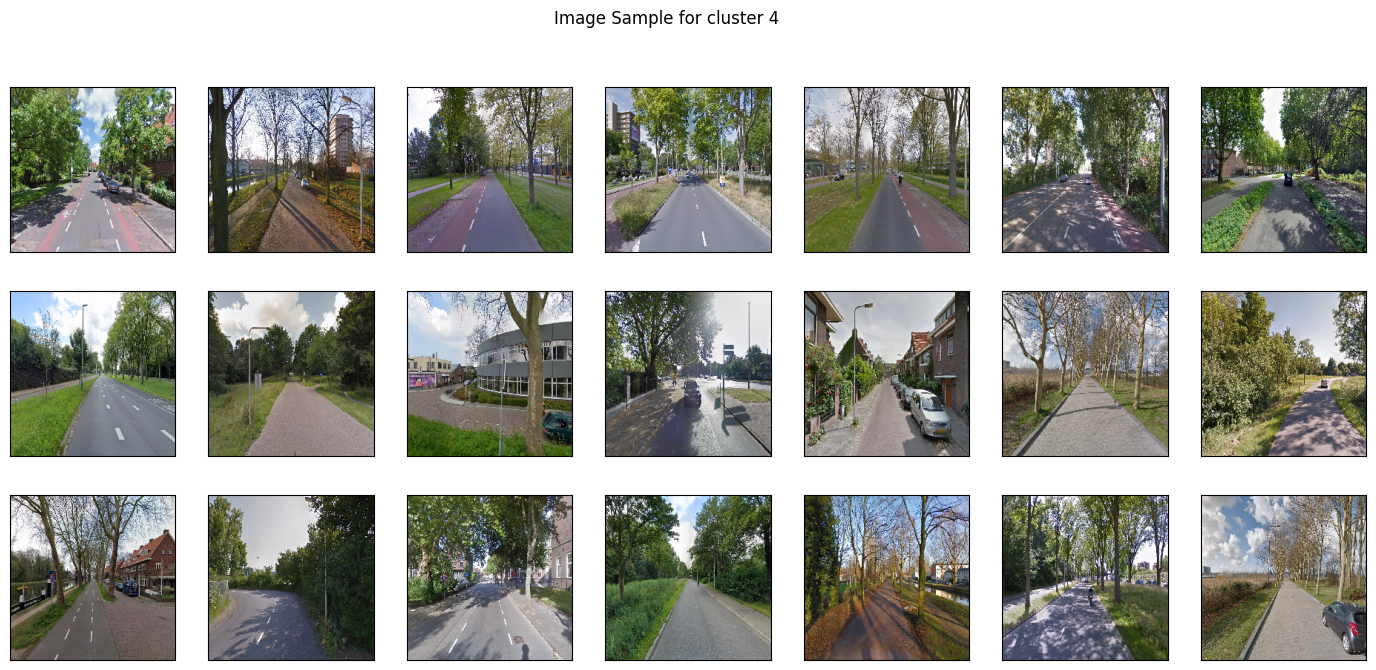

In [12]:
sample_cluster_images(cluster_images, 4)


In [13]:
for cluster, cluster_name in cluster_names.items():
    network['cluster_km'] = network['cluster_km'].replace(cluster, cluster_name)
    network['cluster_hr'] = network['cluster_hr'].replace(cluster, cluster_name)
    network['cluster_gm'] = network['cluster_gm'].replace(cluster, cluster_name)


In [14]:
network

u            v  key       osmid  oneway reversed   length  \
0        27082148     44839614    0    48688450   False        0  141.011   
1        27082148     44835830    0     7537370   False        1   39.821   
2        27082148     44833192    0    48688450   False        1  124.181   
3        30016605     44739609    0   144919697   False        0   77.054   
4        30016605     44736833    0     7539987   False        0   68.460   
...           ...          ...  ...         ...     ...      ...      ...   
5780  11458262729   1833104274    0   557278782   False        0   27.395   
5781  11460591406   1448391106    0   182011757   False        0   33.920   
5782  11460591406   5353328924    0   182011757   False        1    6.424   
5783  11460591406  11460591407    0  1234699977   False        1   28.051   
5784  11460591407  11460591406    0  1234699977   False        0   28.051   

     tunnel access   ref junction  \
0      None   None  None     None   
1      None   None  None     None   
2      None   None  None     None   
3      None   None  None     None   
4      None   None  None     None   
...     ...    ...   ...      ...   
5780   None   None  None     None   
5781   None   None  None     None   
5782   None   None  None     None   
5783   None   None  None     None   
5784   None   None  None     None   

                                               geometry  \
0        LINESTRING (4.37897 52.0084, 4.37721 52.00906)   
1     LINESTRING (4.37897 52.0084, 4.3789 52.00834, ...   
2     LINESTRING (4.37897 52.0084, 4.37971 52.00809,...   
3        LINESTRING (4.35604 51.98636, 4.3558 51.98704)   
4     LINESTRING (4.35604 51.98636, 4.35646 51.98643...   
...                                                 ...   
5780  LINESTRING (4.33716 51.99404, 4.33683 51.99398...   
5781    LINESTRING (4.32608 52.01204, 4.32647 52.01223)   
5782      LINESTRING (4.32608 52.01204, 4.326 52.01201)   
5783    LINESTRING (4.32608 52.01204, 4.32585 52.01225)   
5784    LINESTRING (4.32585 52.01225, 4.32608 52.01204)   

                         cluster_km           cluster_hr  \
0     Residential Artery / Greenery          City Centre   
1               Residential Inner A          City Centre   
2     Residential Artery / Greenery          City Centre   
3               Residential Inner B  Residential Inner A   
4                              None                 None   
...                             ...                  ...   
5780            Residential Inner B  Residential Inner B   
5781               City Centre Core              Highway   
5782               City Centre Core              Highway   
5783                           None                 None   
5784                           None                 None   

                    cluster_gm  
0                  City Centre  
1                  City Centre  
2                  City Centre  
3          Residential Inner B  
4                         None  
...                        ...  
5780       Residential Inner B  
5781  Distributor / Industrial  
5782  Distributor / Industrial  
5783                      None  
5784                      None  

[5785 rows x 15 columns]

In [15]:
# domain_edges = list(range(number_of_clusters))
# domain_edges.append(None)
# range_colors = generate_color_codes(number_of_clusters)
# range_colors.append('darkgray')

domain_edges = cluster_names.values()
range_colors = generate_color_codes(number_of_clusters)

background = alt.Chart(network).mark_geoshape(
    filled=False,
    stroke='darkgray',
    strokeWidth=2.5
).encode(
    tooltip=['osmid:N', 'cluster_km:N', 'cluster_hr:N', 'cluster_gm:N'],
).properties(
    width=400,
    height=550,
).project(
    'mercator'
)

k_means_edges = alt.Chart(network).mark_geoshape(
    filled=False,
    strokeWidth=2.5
).encode(
    tooltip=['osmid:N', 'cluster_km:N', 'cluster_hr:N', 'cluster_gm:N'],
    color = alt.Color('cluster_km:N').scale(domain=domain_edges, range=range_colors)
).properties(
    width=400,
    height=550,
    title='K-means'
).project(
    'mercator'
)

hierarch_edges = alt.Chart(network).mark_geoshape(
    filled=False,
    strokeWidth=2.5
).encode(
    tooltip=['osmid:N', 'cluster_km:N', 'cluster_hr:N', 'cluster_gm:N'],
    color = alt.Color('cluster_hr:N').scale(domain=domain_edges, range=range_colors)
).properties(
    width=400,
    height=550,
    title='Hierachical'
).project(
    'mercator'
)

gaussian_edges = alt.Chart(network).mark_geoshape(
    filled=False,
    strokeWidth=2.5
).encode(
    tooltip=['osmid:N', 'cluster_km:N', 'cluster_hr:N', 'cluster_gm:N'],
    color = alt.Color('cluster_gm:N').scale(domain=domain_edges, range=range_colors)
).properties(
    width=400,
    height=550,
    title='Gaussian Mixture'
).project(
    'mercator'
)


In [16]:
background + k_means_edges | background + hierarch_edges | background + gaussian_edges

alt.HConcatChart(...)